# We used a dataset from kaggle about House Price prediction
https://www.kaggle.com/datasets/prokshitha/home-value-insights/data

for this dataset,we used Linear Regression and also we have

-plotting prediction and Grand Truth values
-use statsmodel for calculate r2_score and measure independent variable necessity
-mean squared score
-split train and testing value


In [52]:
import pandas as pd
import numpy as np


In [100]:
dataset=pd.read_csv("md_data.csv")

In [101]:
dataset

,Country,Total Medals,Gini,Gdp,Hdi,Region,Log_Gdp,Log_Total_Medals,Log_Hdi,Rounded_Hdi,Rounded_Gini
0,Afghanistan,0,0.331399,410.933,0.5,Asia,2.613771,0.000000,-0.3,0.5,0.33
1,Albania,2,0.294196,8299.278,0.8,Europe,3.919040,0.477121,-0.1,0.8,0.29
2,Algeria,3,0.367576,5221.813,0.7,Africa,3.717821,0.602060,-0.1,0.7,0.37
3,Andorra,0,0.313278,43809.726,0.9,Europe,4.641571,0.000000,-0.1,0.9,0.31
4,Angola,0,0.512640,2967.384,0.6,Africa,3.472374,0.000000,-0.2,0.6,0.51
...,...,...,...,...,...,...,...,...,...,...,...
200,Vatican City,0,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
201,Venezuela,0,0.430427,373.781,0.7,South America,2.572617,0.000000,-0.2,0.7,0.43
202,Vietnam,0,0.360930,4324.049,0.7,Asia,3.635891,0.000000,-0.1,0.7,0.36
203,Zambia,1,0.514831,1369.129,0.6,Africa,3.136444,0.301030,-0.2,0.6,0.51


In [102]:
import matplotlib.pyplot as plt

import seaborn as sns

In [103]:
dataset.isnull().sum()

,0
Country,0
Total Medals,0
Gini,12
Gdp,12
Hdi,12
Region,12
Log_Gdp,12
Log_Total_Medals,0
Log_Hdi,12
Rounded_Hdi,12


In [104]:
dataset = dataset.dropna()

In [105]:
dataset.isnull().sum()

,0
Country,0
Total Medals,0
Gini,0
Gdp,0
Hdi,0
Region,0
Log_Gdp,0
Log_Total_Medals,0
Log_Hdi,0
Rounded_Hdi,0


In [106]:
dataset

,Country,Total Medals,Gini,Gdp,Hdi,Region,Log_Gdp,Log_Total_Medals,Log_Hdi,Rounded_Hdi,Rounded_Gini
0,Afghanistan,0,0.331399,410.933,0.5,Asia,2.613771,0.000000,-0.3,0.5,0.33
1,Albania,2,0.294196,8299.278,0.8,Europe,3.919040,0.477121,-0.1,0.8,0.29
2,Algeria,3,0.367576,5221.813,0.7,Africa,3.717821,0.602060,-0.1,0.7,0.37
3,Andorra,0,0.313278,43809.726,0.9,Europe,4.641571,0.000000,-0.1,0.9,0.31
4,Angola,0,0.512640,2967.384,0.6,Africa,3.472374,0.000000,-0.2,0.6,0.51
...,...,...,...,...,...,...,...,...,...,...,...
199,Vanuatu,0,0.323176,3364.838,0.6,Oceania,3.526964,0.000000,-0.2,0.6,0.32
201,Venezuela,0,0.430427,373.781,0.7,South America,2.572617,0.000000,-0.2,0.7,0.43
202,Vietnam,0,0.360930,4324.049,0.7,Asia,3.635891,0.000000,-0.1,0.7,0.36
203,Zambia,1,0.514831,1369.129,0.6,Africa,3.136444,0.301030,-0.2,0.6,0.51


In [107]:
dataset["Region"].unique()

array(['Asia', 'Europe', 'Africa', 'North America', 'South America',
       'Oceania'], dtype=object)

In [108]:
dataset["Country"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia',
       'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti',
       'Honduras', 'Hungary', 'Iceland',

In [109]:
dataset=pd.get_dummies(dataset,columns=["Region"],drop_first=True,dtype=int)
dataset.head()

,Country,Total Medals,Gini,Gdp,Hdi,Log_Gdp,Log_Total_Medals,Log_Hdi,Rounded_Hdi,Rounded_Gini,Region_Asia,Region_Europe,Region_North America,Region_Oceania,Region_South America
0,Afghanistan,0,0.331399,410.933,0.5,2.613771,0.000000,-0.3,0.5,0.33,1,0,0,0,0
1,Albania,2,0.294196,8299.278,0.8,3.919040,0.477121,-0.1,0.8,0.29,0,1,0,0,0
2,Algeria,3,0.367576,5221.813,0.7,3.717821,0.602060,-0.1,0.7,0.37,0,0,0,0,0
3,Andorra,0,0.313278,43809.726,0.9,4.641571,0.000000,-0.1,0.9,0.31,0,1,0,0,0
4,Angola,0,0.512640,2967.384,0.6,3.472374,0.000000,-0.2,0.6,0.51,0,0,0,0,0


In [110]:
X=dataset[['Gini','Gdp','Hdi','Region_Asia','Region_Europe','Region_North America','Region_Oceania','Region_South America']]
y=dataset['Total Medals']

In [111]:
X

,Gini,Gdp,Hdi,Region_Asia,Region_Europe,Region_North America,Region_Oceania,Region_South America
0,0.331399,410.933,0.5,1,0,0,0,0
1,0.294196,8299.278,0.8,0,1,0,0,0
2,0.367576,5221.813,0.7,0,0,0,0,0
3,0.313278,43809.726,0.9,0,1,0,0,0
4,0.512640,2967.384,0.6,0,0,0,0,0
...,...,...,...,...,...,...,...,...
199,0.323176,3364.838,0.6,0,0,0,1,0
201,0.430427,373.781,0.7,0,0,0,0,1
202,0.360930,4324.049,0.7,1,0,0,0,0
203,0.514831,1369.129,0.6,0,0,0,0,0


In [112]:
y

,Total Medals
0,0
1,2
2,3
3,0
4,0
...,...
199,0
201,0
202,0
203,1


In [113]:
from sklearn.linear_model import LinearRegression

In [114]:
lr=LinearRegression()

In [115]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=100)
lr.fit(X_train,y_train)

LinearRegression()

In [116]:
y_pred=lr.predict(X_test)

In [117]:
len(y_test)

39

In [118]:
len(y_pred)

39

Text(0, 0.5, 'Prediction')

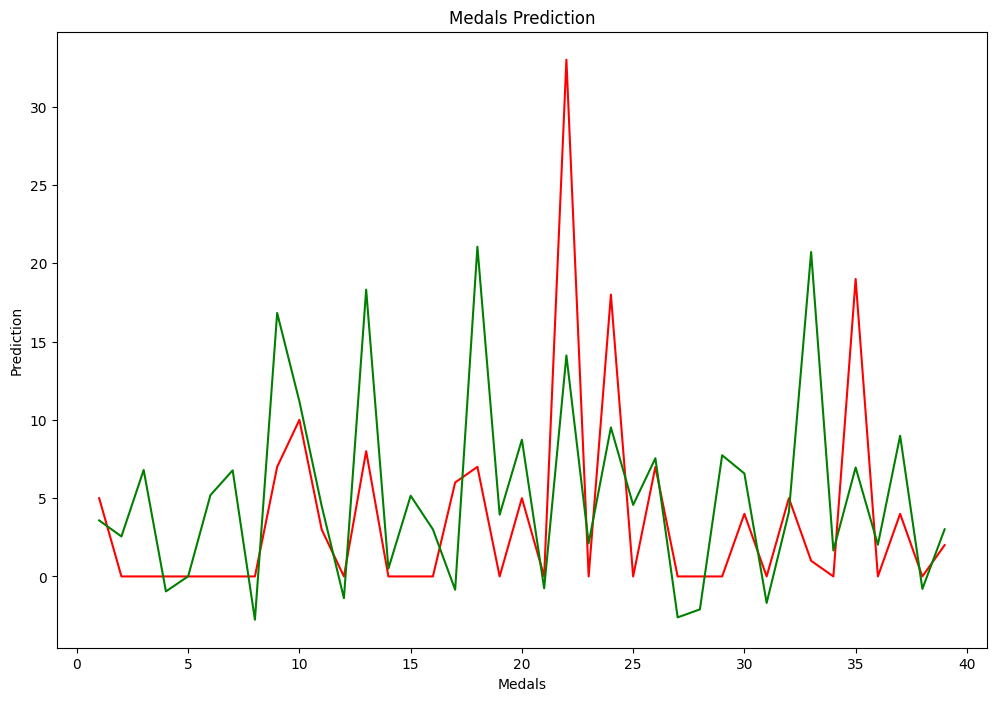

In [119]:
import matplotlib.pyplot as plt
index=np.arange(1,40)
fig,ax=plt.subplots(figsize=(12,8))
ax.plot(index,y_test,label="Grand Truth",color="red")
ax.plot(index,y_pred,label="Prediction",color="green")
plt.title("Medals Prediction")
plt.xlabel("Medals")
plt.ylabel("Prediction")


In [120]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mse

45.08438312946512

In [92]:
#statsmodels is a library which is measure prediction accuracy and other details for models
!pip install statsmodels

In [93]:
#lets see the model accuracy and measure independent variable necessity
#r2_score is compare testing y_pred and grand truth y values and give us a score like accuracy
#p>|t| is show us to independent variable necessity

import statsmodels.api as sm
X_train_ols=sm.add_constant(X_train)
sm_model=sm.OLS(y_train,X_train_ols)
result=sm_model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           Total Medals   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     2.928
Date:                Fri, 17 Jan 2025   Prob (F-statistic):            0.00464
Time:                        19:31:24   Log-Likelihood:                -598.55
No. Observations:                 154   AIC:                             1215.
Df Residuals:                     145   BIC:                             1242.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -17.1167 